# Predicting the weather in Winnipeg using Machine Learning
Data Source: https://winnipeg.weatherstats.ca/download.html

## Abstract
This notebook is a simple example of how to use machine learning to predict the weather in Winnipeg. The data used in this notebook is from the WeatherStats website. The data is from 1954 to 2019. The data is split into training and testing data. The training data is used to train the model. The testing data is used to test the model. The model is then used to predict the weather in Winnipeg for the year 2022.<br>

Dataset file name: winnipeg_weather.csv contains the weather data from 1954 to 2019 with the following columns:<br>
* Year-Month-Day
* Dew Point (C) Max and Min
* Temp (C) Max and Min
* Relative Humidity (%) - Max and Min
* Wind Speed (km/h) - Max and Min
* Precipitation (mm)
* Rain (mm)
* Snow (cm)
* Snow on Ground (cm)
* Solar Radiation (MJ/m2)

Frist we import the necessary libraries. I will use the pandas library to read the data from the csv file, then check the data to make sure there are no missing values, if there are missing values I will fill them in with the mean of the values in the data between the missing values. In this notebook I will only uss max temperature, min temperature, precipitation and snow values to create a new dataframe and convert the date column to a datetime object. Max, min temperature and precipitation will plotted. Linear model Ridge Regression will be used to train the model. Interactive plots will be used to show the model predictions.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Read in the data
weather = pd.read_csv('winnipeg_normal_daily.csv', index_col='date')

In [4]:
# Print the first 5 rows of the data
print(weather.head())

            max_dew_point_v  max_dew_point_s  max_dew_point_c  \
date                                                            
4/12/2022             -8.81             6.96              450   
3/12/2022             -8.59             6.68              450   
2/12/2022             -8.23             6.43              450   
1/12/2022             -7.82             6.20              450   
30/11/2022            -7.50             6.19              450   

                  max_dew_point_d  max_relative_humidity_v  \
date                                                         
4/12/2022   1992-11-27 2021-12-11                    89.42   
3/12/2022   1992-11-26 2021-12-10                    89.72   
2/12/2022   1992-11-25 2021-12-09                    89.91   
1/12/2022   1992-11-24 2021-12-08                    90.05   
30/11/2022  1992-11-23 2021-12-07                    90.18   

            max_relative_humidity_s  max_relative_humidity_c  \
date                                         

In [5]:
# Check zero values
weather.apply(pd.isnull).sum()/weather.shape[0]

max_dew_point_v            0.000000
max_dew_point_s            0.000000
max_dew_point_c            0.000000
max_dew_point_d            0.000000
max_relative_humidity_v    0.000000
max_relative_humidity_s    0.000000
max_relative_humidity_c    0.000000
max_relative_humidity_d    0.000000
max_temperature_v          0.000000
max_temperature_s          0.000000
max_temperature_c          0.000000
max_temperature_d          0.000000
max_wind_speed_v           0.000000
max_wind_speed_s           0.000000
max_wind_speed_c           0.000000
max_wind_speed_d           0.000000
min_dew_point_v            0.000000
min_dew_point_s            0.000000
min_dew_point_c            0.000000
min_dew_point_d            0.000000
min_relative_humidity_v    0.000000
min_relative_humidity_s    0.000000
min_relative_humidity_c    0.000000
min_relative_humidity_d    0.000000
min_temperature_v          0.000000
min_temperature_s          0.000000
min_temperature_c          0.000000
min_temperature_d          0

In [6]:
# Rename the columns and create a new dataframe
weather_core = weather[['max_temperature_v', 'min_temperature_v', 'precipitation_v', 'snow_v']].copy()
weather_core.columns = ['max_temp', 'min_temp', 'precipitation', 'snow']

In [7]:
weather_core.head()

,max_temp,min_temp,precipitation,snow
date,,,,
4/12/2022,-5.94,-14.93,0.53,0.74
3/12/2022,-5.72,-14.64,0.54,0.73
2/12/2022,-5.37,-14.24,0.58,0.77
1/12/2022,-4.94,-13.84,0.59,0.81
30/11/2022,-4.54,-13.51,0.57,0.78


In [8]:
weather_core.shape

(25175, 4)

In [9]:
# check for missing values
weather_core.apply(pd.isnull).sum()

max_temp         0
min_temp         0
precipitation    0
snow             0
dtype: int64

In [10]:
weather_core[pd.isnull(weather_core["max_temp"])]

,max_temp,min_temp,precipitation,snow
date,,,,


In [11]:
weather_core[pd.isnull(weather_core["min_temp"])]


,max_temp,min_temp,precipitation,snow
date,,,,


In [12]:
# Check snow column
weather_core.snow.value_counts()

0.00    7773
0.01     590
0.02     563
0.04     349
0.71     337
        ... 
1.04       3
1.06       3
1.08       1
1.09       1
1.12       1
Name: snow, Length: 111, dtype: int64

In [13]:
# Check precipitation column
weather_core.precipitation.value_counts() / weather_core.shape[0]

0.67    0.014260
0.66    0.013466
0.68    0.013347
0.63    0.013267
0.62    0.012830
          ...   
3.90    0.000040
3.93    0.000040
3.85    0.000040
3.66    0.000040
3.69    0.000040
Name: precipitation, Length: 349, dtype: float64

In [14]:
# check data types
weather_core.dtypes

max_temp         float64
min_temp         float64
precipitation    float64
snow             float64
dtype: object

In [15]:
# check index
weather_core.index

Index(['4/12/2022', '3/12/2022', '2/12/2022', '1/12/2022', '30/11/2022',
       '29/11/2022', '28/11/2022', '27/11/2022', '26/11/2022', '25/11/2022',
       ...
       '10/1/1954', '9/1/1954', '8/1/1954', '7/1/1954', '6/1/1954', '5/1/1954',
       '4/1/1954', '3/1/1954', '2/1/1954', '1/1/1954'],
      dtype='object', name='date', length=25175)

In [16]:
# convert index to datetime
# user dayfirst=True to indicate that the first value in the date is the day
weather_core.index = pd.to_datetime(weather_core.index, dayfirst=True, format='%d/%m/%Y')

In [17]:
# check index
weather_core.index

DatetimeIndex(['2022-12-04', '2022-12-03', '2022-12-02', '2022-12-01',
               '2022-11-30', '2022-11-29', '2022-11-28', '2022-11-27',
               '2022-11-26', '2022-11-25',
               ...
               '1954-01-10', '1954-01-09', '1954-01-08', '1954-01-07',
               '1954-01-06', '1954-01-05', '1954-01-04', '1954-01-03',
               '1954-01-02', '1954-01-01'],
              dtype='datetime64[ns]', name='date', length=25175, freq=None)

In [18]:
# check index year
weather_core.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954, 1954],
           dtype='int64', name='date', length=25175)

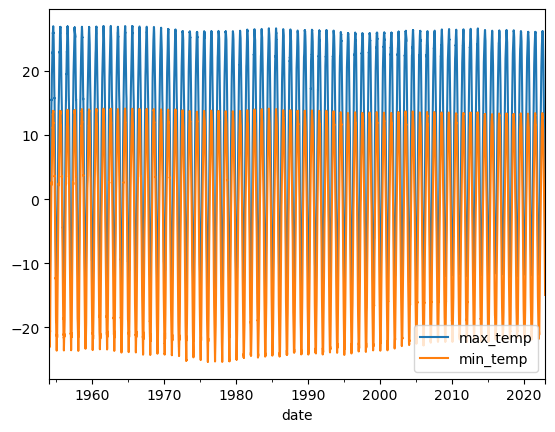

In [19]:
# Plot min and max temperature
weather_core[['max_temp', 'min_temp']].plot()
plt.show()

In [20]:
weather_core.index.year.value_counts().sort_index()

1954    365
1955    365
1956    366
1957    365
1958    365
       ... 
2018    365
2019    365
2020    366
2021    365
2022    338
Name: date, Length: 69, dtype: int64

<AxesSubplot:xlabel='date'>

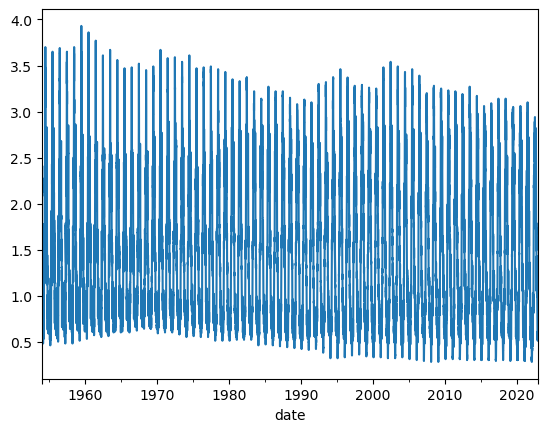

In [21]:
# Plot precipitation
weather_core.precipitation.plot()

<AxesSubplot:xlabel='date'>

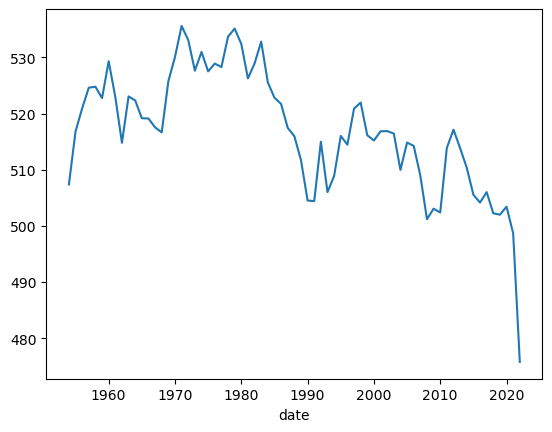

In [22]:
# Plot sum of precipitation by year
weather_core.groupby(weather_core.index.year).apply(lambda x: x['precipitation'].sum()).plot()

In [23]:
# Create a target column. This should be the maximum temperature for the next day
weather_core['target'] = weather_core['max_temp'].shift(-1)

In [24]:
weather_core

,max_temp,min_temp,precipitation,snow,target
date,,,,,
2022-12-04,-5.94,-14.93,0.53,0.74,-5.72
2022-12-03,-5.72,-14.64,0.54,0.73,-5.37
2022-12-02,-5.37,-14.24,0.58,0.77,-4.94
2022-12-01,-4.94,-13.84,0.59,0.81,-4.54
2022-11-30,-4.54,-13.51,0.57,0.78,-4.19
...,...,...,...,...,...
1954-01-05,-11.85,-21.10,0.68,0.68,-11.89
1954-01-04,-11.89,-21.04,0.68,0.68,-12.08
1954-01-03,-12.08,-21.15,0.66,0.66,-12.23


In [25]:
# remove the last row because it has no target value
weather_core = weather_core.iloc[:-1,:].copy()

In [26]:
weather_core

,max_temp,min_temp,precipitation,snow,target
date,,,,,
2022-12-04,-5.94,-14.93,0.53,0.74,-5.72
2022-12-03,-5.72,-14.64,0.54,0.73,-5.37
2022-12-02,-5.37,-14.24,0.58,0.77,-4.94
2022-12-01,-4.94,-13.84,0.59,0.81,-4.54
2022-11-30,-4.54,-13.51,0.57,0.78,-4.19
...,...,...,...,...,...
1954-01-06,-11.75,-21.10,0.73,0.73,-11.85
1954-01-05,-11.85,-21.10,0.68,0.68,-11.89
1954-01-04,-11.89,-21.04,0.68,0.68,-12.08


In [27]:
# import linear model Ridge
from sklearn.linear_model import Ridge

In [28]:
reg = Ridge(alpha=0.1)

In [29]:
predictors = ['max_temp', 'min_temp', 'precipitation', 'snow']

In [30]:
# split the data into training and test sets
train = weather_core[weather_core.index.year < 2009]
test = weather_core[weather_core.index.year >= 2009]

In [31]:
train

,max_temp,min_temp,precipitation,snow,target
date,,,,,
2008-12-31,-10.94,-20.44,0.66,0.75,-10.95
2008-12-30,-10.95,-20.34,0.62,0.69,-10.80
2008-12-29,-10.80,-20.17,0.62,0.71,-10.68
2008-12-28,-10.68,-20.07,0.60,0.69,-10.65
2008-12-27,-10.65,-20.00,0.62,0.71,-10.57
...,...,...,...,...,...
1954-01-06,-11.75,-21.10,0.73,0.73,-11.85
1954-01-05,-11.85,-21.10,0.68,0.68,-11.89
1954-01-04,-11.89,-21.04,0.68,0.68,-12.08


In [32]:
test

,max_temp,min_temp,precipitation,snow,target
date,,,,,
2022-12-04,-5.94,-14.93,0.53,0.74,-5.72
2022-12-03,-5.72,-14.64,0.54,0.73,-5.37
2022-12-02,-5.37,-14.24,0.58,0.77,-4.94
2022-12-01,-4.94,-13.84,0.59,0.81,-4.54
2022-11-30,-4.54,-13.51,0.57,0.78,-4.19
...,...,...,...,...,...
2009-01-05,-11.64,-21.18,0.68,0.79,-11.47
2009-01-04,-11.47,-20.94,0.74,0.84,-11.23
2009-01-03,-11.23,-20.75,0.75,0.85,-11.09


Training and test set split: 80% and 20% respectively

In [33]:
# fit the model
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [34]:
prediction = reg.predict(test[predictors])

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
mean_squared_error(test['target'], prediction)

0.04993208034289108

In [37]:
mean_absolute_error(test['target'], prediction)

0.18542040520019348

In [38]:
conbined = pd.concat([test['target'], pd.Series(prediction, index=test.index)], axis=1)
conbined.columns = ['actual', 'predicted']

In [39]:
conbined

,actual,predicted
date,,
2022-12-04,-5.72,-5.838195
2022-12-03,-5.37,-5.601965
2022-12-02,-4.94,-5.256369
2022-12-01,-4.54,-4.843504
2022-11-30,-4.19,-4.441482
...,...,...
2009-01-05,-11.47,-11.673480
2009-01-04,-11.23,-11.509127
2009-01-03,-11.09,-11.279283


<AxesSubplot:xlabel='date'>

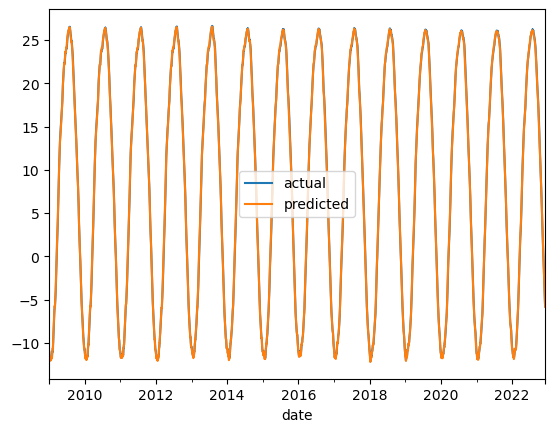

In [40]:
conbined.plot()

In [41]:
reg.coef_

array([ 0.84706239,  0.15853131,  0.01652395, -0.37373709])

In [42]:
# plot interactive graph
import plotly.express as px
fig = px.line(conbined, x=conbined.index, y=['actual', 'predicted'])
fig.show()